In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Read Data

In [2]:
url='https://raw.githubusercontent.com/jarif87/DataSets/main/uci_breast_cancer.csv'
df=pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.shape

(569, 33)

In [7]:
df.drop(["id","Unnamed: 32"],axis=1,inplace=True)


In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Correlation Matrix

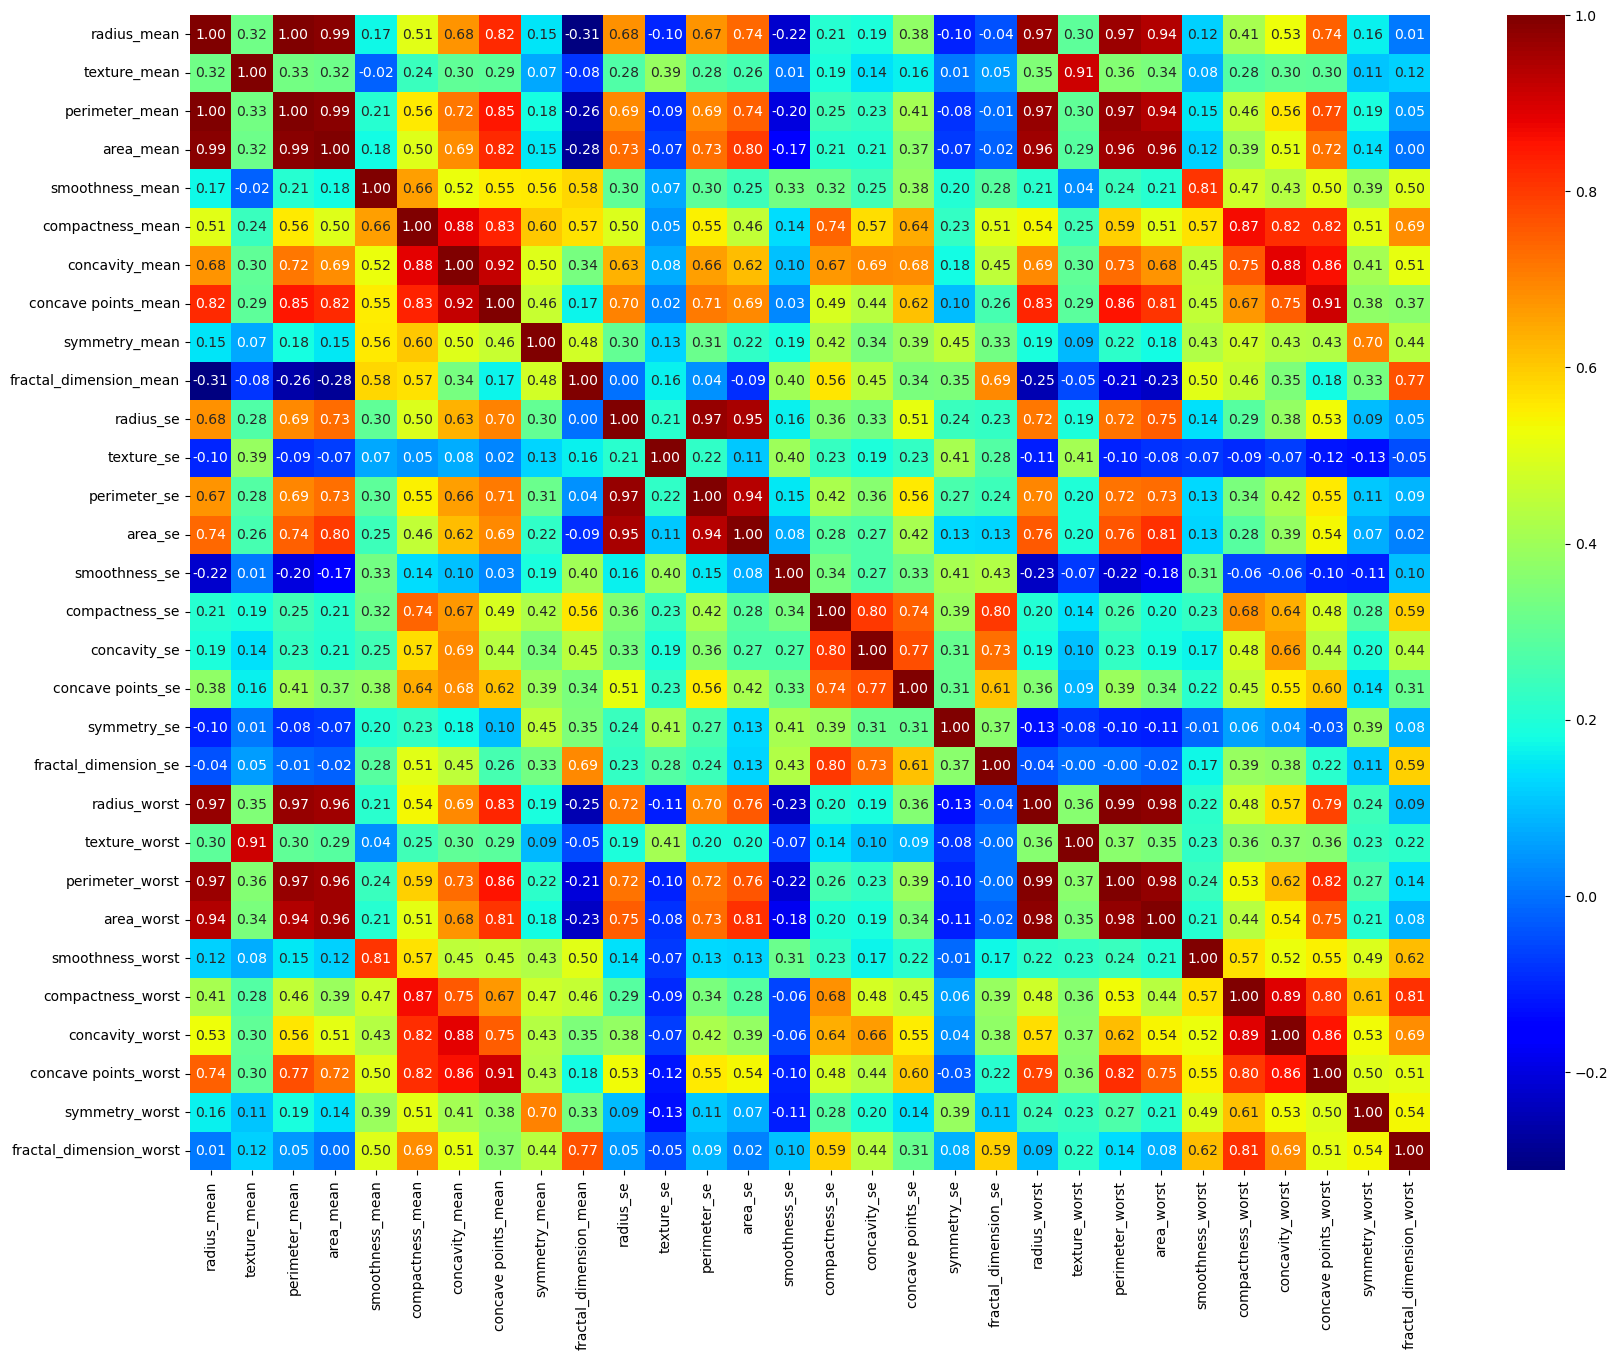

In [9]:
cor=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True,fmt=".2f",cmap="jet")
plt.show()

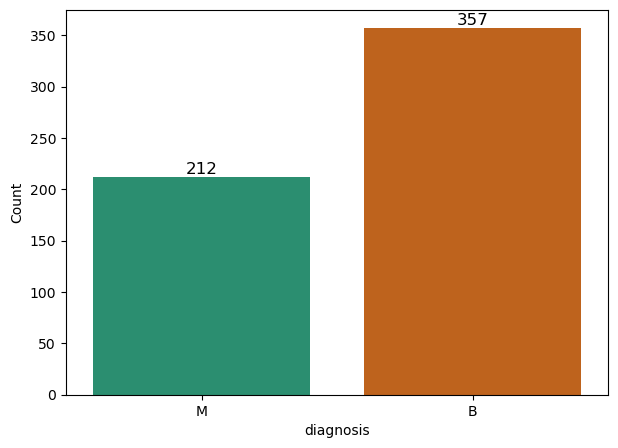

In [10]:

plt.figure(figsize=(7, 5))
ax = sns.countplot(x='diagnosis', data=df, palette="Dark2")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

plt.ylabel('Count')

plt.show()

#### **M==1**

#### **B==0**

In [11]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
X=df.drop("diagnosis",axis=1)
Y=df["diagnosis"]

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# DecisionTreeClassifier and Evaluation

In [14]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
pred=dtc.predict(X_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# Evaluate DecisionTreeClassifier Model Performance

Accuracy Score : 0.935672514619883
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       108
           1       0.88      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



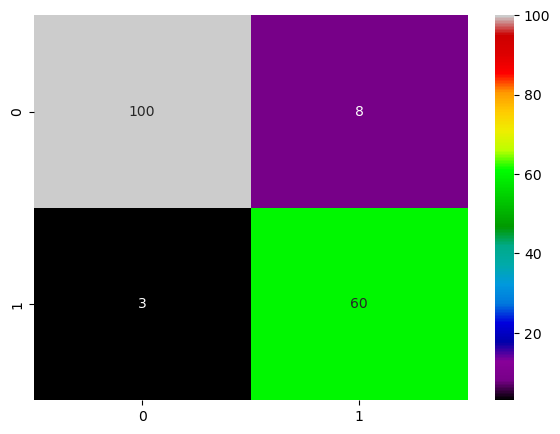

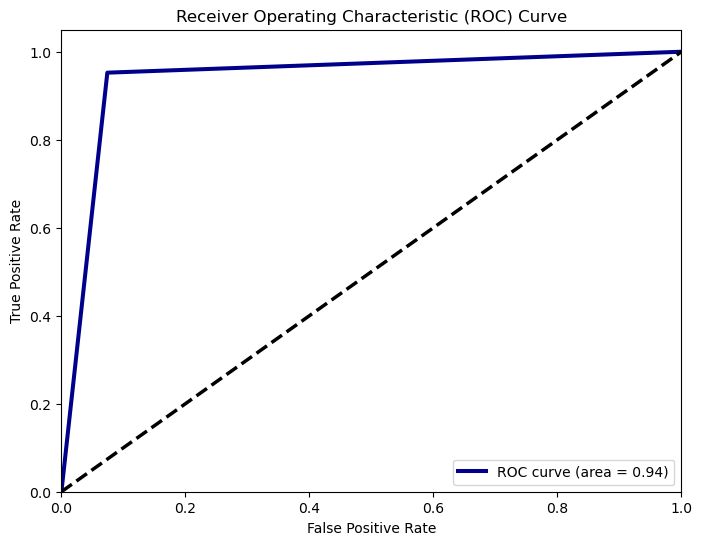

In [16]:
acc=accuracy_score(Y_test,pred)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,pred))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,pred)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="nipy_spectral")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# RandomForestClassifier

In [17]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [18]:
pred0=rf.predict(X_test)
pred0

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Evaluate RandomForestClassifier Model Performance

Accuracy Score : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



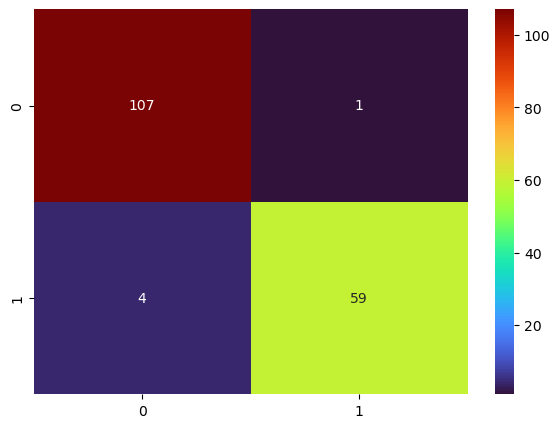

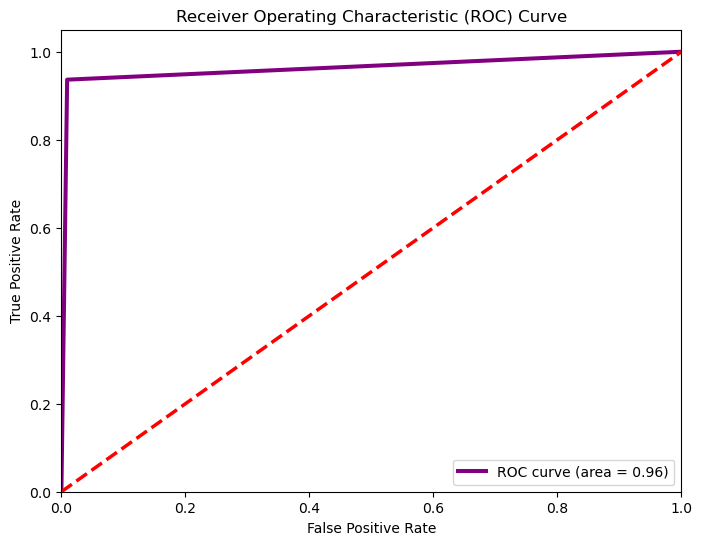

In [19]:
acc=accuracy_score(Y_test,pred0)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,pred0))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,pred0)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="turbo")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,pred0)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Initialize Hyperparameters

In [20]:
dtc_parameter = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'class_weight': [None, 'balanced']}





rf_parameter = {
    'n_estimators': [100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
    'max_features': ['sqrt', 'log2']
}



# Decision Tree Grid Search

In [21]:

dtc_grid=GridSearchCV(estimator=dtc,param_grid=dtc_parameter,cv=5,n_jobs=-1)
dtc_grid.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [22]:
# dtc_grid.cv_results_


In [23]:
tuning_result_dtc_grid = pd.DataFrame(dtc_grid.cv_results_)
tuning_result_dtc_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_max_features,param_min_impurity_decrease,param_min_samples_leaf,...,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004861,0.000671,0.002753,0.000126,None,gini,None,sqrt,0.0,1,...,best,"{'class_weight': None, 'criterion': 'gini', 'm...",0.9000,0.8875,0.9375,0.924051,0.924051,0.914620,0.018169,663
1,0.003321,0.000093,0.002595,0.000066,None,gini,None,sqrt,0.0,1,...,random,"{'class_weight': None, 'criterion': 'gini', 'm...",0.9375,0.9125,0.9250,0.974684,0.873418,0.924620,0.032988,246
2,0.004514,0.000463,0.002807,0.000105,None,gini,None,sqrt,0.0,1,...,best,"{'class_weight': None, 'criterion': 'gini', 'm...",0.9250,0.9000,0.9250,0.860759,0.873418,0.896835,0.026254,1274
3,0.003545,0.000131,0.002835,0.000111,None,gini,None,sqrt,0.0,1,...,random,"{'class_weight': None, 'criterion': 'gini', 'm...",0.9250,0.9125,0.9500,0.924051,0.873418,0.916994,0.024990,641
4,0.004265,0.000162,0.002962,0.000436,None,gini,None,sqrt,0.0,1,...,best,"{'class_weight': None, 'criterion': 'gini', 'm...",0.9375,0.8875,0.9625,0.924051,0.898734,0.922057,0.026893,400


# Best Parameter Decision Tree

In [24]:
dtc_grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

# Evaluate The Optimized Decision Tree (Grid Search)

Accuracy Score : 0.9181286549707602
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       108
           1       0.87      0.92      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



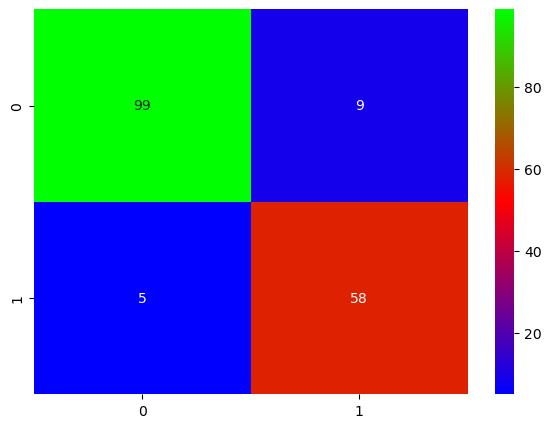

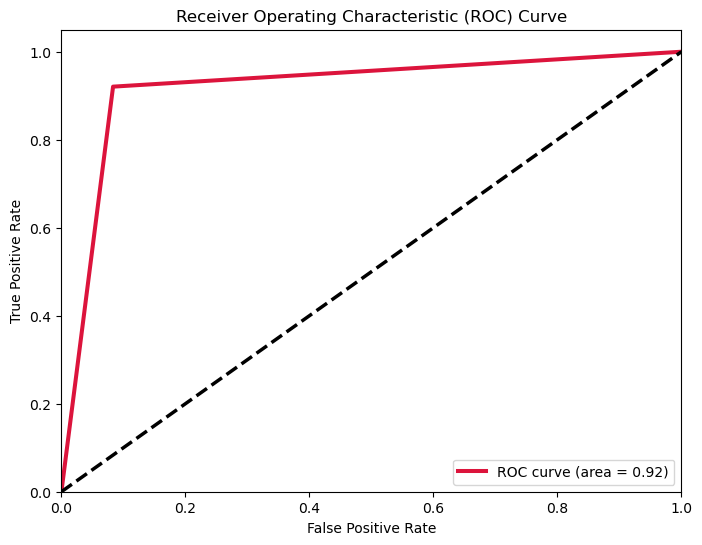

In [25]:

dtc_optimize=dtc_grid.predict(X_test)
acc=accuracy_score(Y_test,dtc_optimize)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,dtc_optimize))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,dtc_optimize)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="brg")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,dtc_optimize)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='crimson', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#  Decision Tree (Random Search)

In [26]:
dtc_random_search = RandomizedSearchCV(dtc, param_distributions=dtc_parameter, n_iter=50, cv=5)
dtc_random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_impurity_decrease': [0.0, 0.1,
                                                                  0.2],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'splitter': ['best', 'random']})

In [27]:
tuning_result_dtc_random = pd.DataFrame(dtc_random_search.cv_results_)
tuning_result_dtc_random.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_features,param_max_depth,...,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004355,0.001553,0.002082,0.000268,best,2,2,0.2,sqrt,10,...,balanced,"{'splitter': 'best', 'min_samples_split': 2, '...",0.9375,0.8875,0.900,0.911392,0.924051,0.912089,0.017550,16
1,0.002599,0.000056,0.001801,0.000027,best,2,1,0.1,sqrt,20,...,None,"{'splitter': 'best', 'min_samples_split': 2, '...",0.8875,0.8875,0.925,0.873418,0.924051,0.899494,0.021077,21
2,0.005369,0.000306,0.001812,0.000037,best,5,4,0.0,None,30,...,None,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9625,0.9250,0.925,0.949367,0.924051,0.937184,0.015866,1
3,0.002451,0.000044,0.001866,0.000031,random,10,4,0.1,log2,30,...,balanced,"{'splitter': 'random', 'min_samples_split': 10...",0.6625,0.6250,0.625,0.367089,0.810127,0.617943,0.142792,50
4,0.002689,0.000712,0.002405,0.000466,random,2,1,0.2,None,10,...,None,"{'splitter': 'random', 'min_samples_split': 2,...",0.9125,0.6250,0.800,0.911392,0.620253,0.773829,0.130057,44


# Decision Tree Random_search (best Parameter)

In [28]:
dtc_random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.0,
 'max_features': None,
 'max_depth': 30,
 'criterion': 'gini',
 'class_weight': None}

In [29]:
# dtc_random_search.best_estimator_

 # Evaluate The Optimized Decision Tree (Random Search)

Accuracy Score : 0.9532163742690059
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



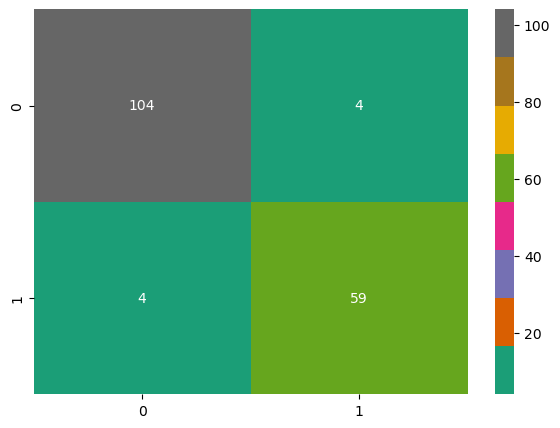

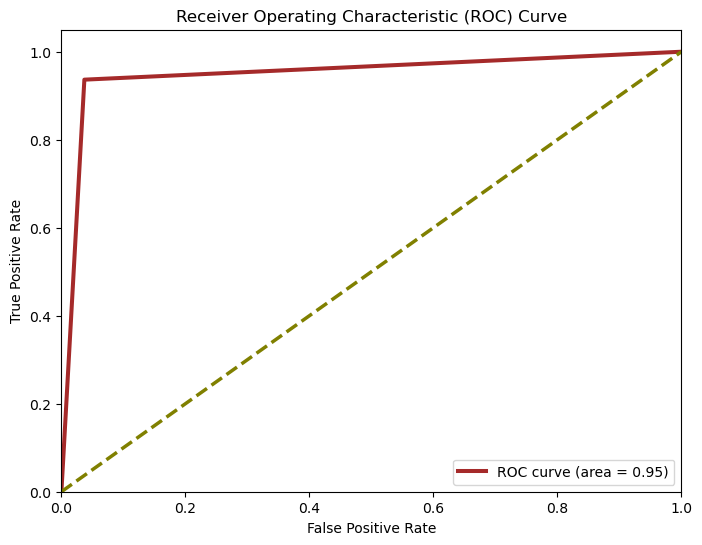

In [30]:

dtc_rand=dtc_random_search.predict(X_test)
acc=accuracy_score(Y_test,dtc_rand)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,dtc_rand))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,dtc_rand)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="Dark2")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,dtc_rand)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='olive', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest (random Search)

In [31]:
rf_random=RandomizedSearchCV(rf, rf_parameter, n_iter=100, random_state=42, cv=5, n_jobs=-1)
rf_random.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 150]},
                   random_state=42)

In [32]:
print("Best hyperparameters from Random Search:")
print(rf_random.best_params_)
print("=======================================================================")
print("=======================================================================")
print("=======================================================================")
print("Best score from Random Search:", rf_random.best_score_)

Best hyperparameters from Random Search:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced', 'bootstrap': False}
Best score from Random Search: 0.9573101265822783


In [33]:
tuning_result_rf_random = pd.DataFrame(rf_random.cv_results_)
tuning_result_rf_random.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,...,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.274979,0.004833,0.012058,0.000674,100,2,2,log2,10,entropy,...,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9625,0.9375,0.9625,0.949367,0.936709,0.949715,0.011361,70
1,0.276967,0.006350,0.011661,0.000661,100,5,1,log2,None,entropy,...,False,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.9625,0.9375,0.9625,0.949367,0.936709,0.949715,0.011361,70
2,0.493107,0.015280,0.019174,0.003264,150,5,1,sqrt,10,entropy,...,False,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.9625,0.9375,0.9625,0.974684,0.936709,0.954778,0.015103,20
3,0.301689,0.029536,0.013157,0.001604,100,2,2,log2,20,gini,...,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9625,0.9375,0.9625,0.936709,0.949367,0.949715,0.011361,62
4,0.364550,0.011968,0.013086,0.000163,100,2,1,log2,None,entropy,...,True,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.9750,0.9500,0.9625,0.949367,0.949367,0.957247,0.010193,12


 # Evaluate The Optimized Random Forest (Random Search)

Accuracy Score : 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



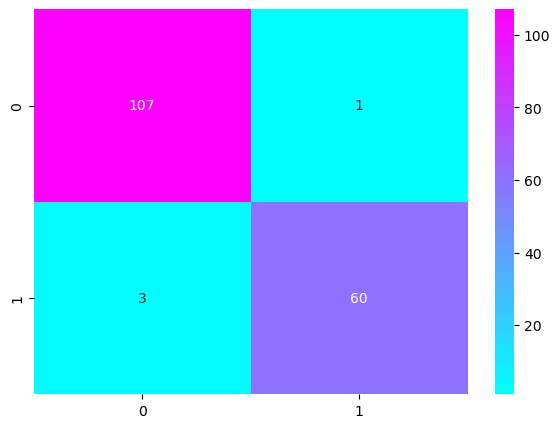

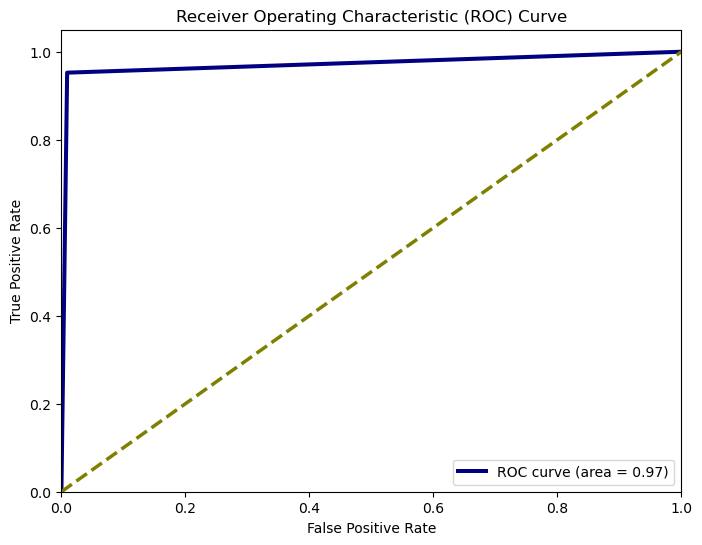

In [34]:

rf_rand=rf_random.predict(X_test)
acc=accuracy_score(Y_test,rf_rand)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,rf_rand))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,rf_rand)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="cool")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,rf_rand)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='olive', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest (Grid Search)

In [35]:
rf_grid = GridSearchCV(rf, rf_parameter, cv=5, n_jobs=-1,scoring='accuracy')
rf_grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 150]},
             scoring='accuracy')

In [36]:
print("Best hyperparameters from Random Grid:")
print(rf_grid.best_params_)
print("=======================================================================")
print("=======================================================================")
print("=======================================================================")
print("Best score from Random Grid:", rf_grid.best_score_)

Best hyperparameters from Random Grid:
{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best score from Random Grid: 0.9598101265822784


In [37]:
tuning_result_rf_grid = pd.DataFrame(rf_grid.cv_results_)
tuning_result_rf_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_class_weight,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,...,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.383429,0.106841,0.015050,0.005486,True,None,gini,None,sqrt,1,...,100,"{'bootstrap': True, 'class_weight': None, 'cri...",0.9625,0.95,0.9750,0.936709,0.924051,0.949652,0.018059,314
1,0.736707,0.048479,0.022436,0.008680,True,None,gini,None,sqrt,1,...,150,"{'bootstrap': True, 'class_weight': None, 'cri...",0.9500,0.95,0.9750,0.949367,0.924051,0.949684,0.016114,311
2,0.361184,0.067185,0.011342,0.000142,True,None,gini,None,sqrt,1,...,100,"{'bootstrap': True, 'class_weight': None, 'cri...",0.9375,0.95,0.9750,0.936709,0.949367,0.949715,0.013841,250
3,0.457239,0.004443,0.015157,0.000192,True,None,gini,None,sqrt,1,...,150,"{'bootstrap': True, 'class_weight': None, 'cri...",0.9375,0.95,0.9750,0.949367,0.949367,0.952247,0.012303,166
4,0.300954,0.003549,0.010996,0.000210,True,None,gini,None,sqrt,2,...,100,"{'bootstrap': True, 'class_weight': None, 'cri...",0.9500,0.95,0.9625,0.936709,0.949367,0.949715,0.008160,250


 # Evaluate The Optimized Random Forest (Grid Search)

Accuracy Score : 0.9707602339181286
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



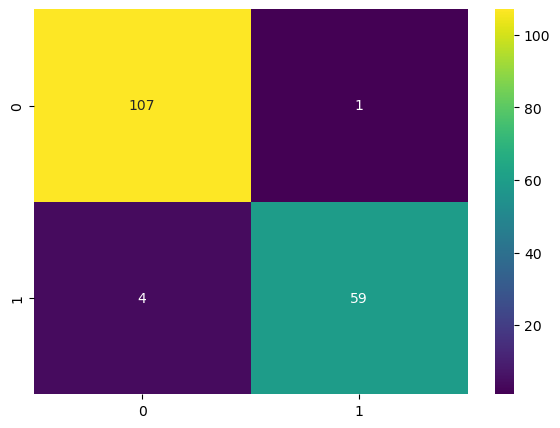

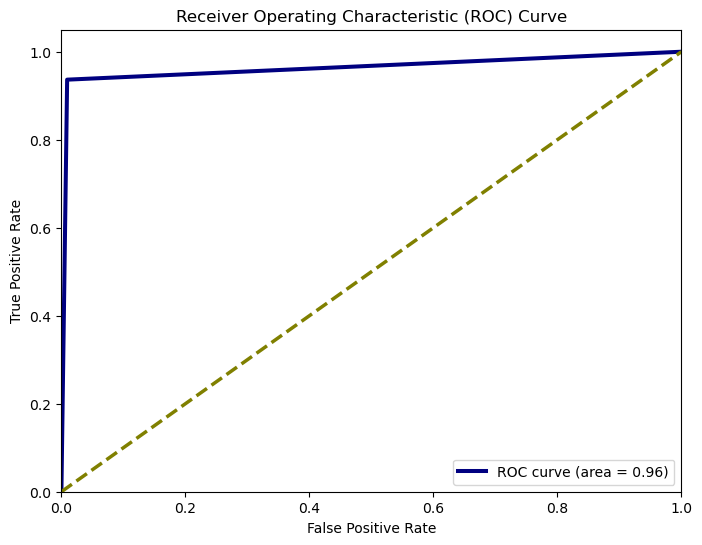

In [38]:
rf_grid=rf_grid.predict(X_test)
acc=accuracy_score(Y_test,rf_grid)
print("Accuracy Score :",acc)
print("======================================================")
print("======================================================")
print(classification_report(Y_test,rf_grid))
print("========================================================================")
print("========================================================================")
cf_matrix=confusion_matrix(Y_test,rf_grid)
plt.figure(figsize=(7,5))
sns.heatmap(cf_matrix,annot=True,fmt="d",cmap="viridis")
plt.show()

print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")
print("==========================================================================================")


fpr, tpr, thresholds = roc_curve(Y_test,rf_grid)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='navy', lw=2.9,label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='olive', linestyle='--',lw=2.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Visualize the tree before pruning

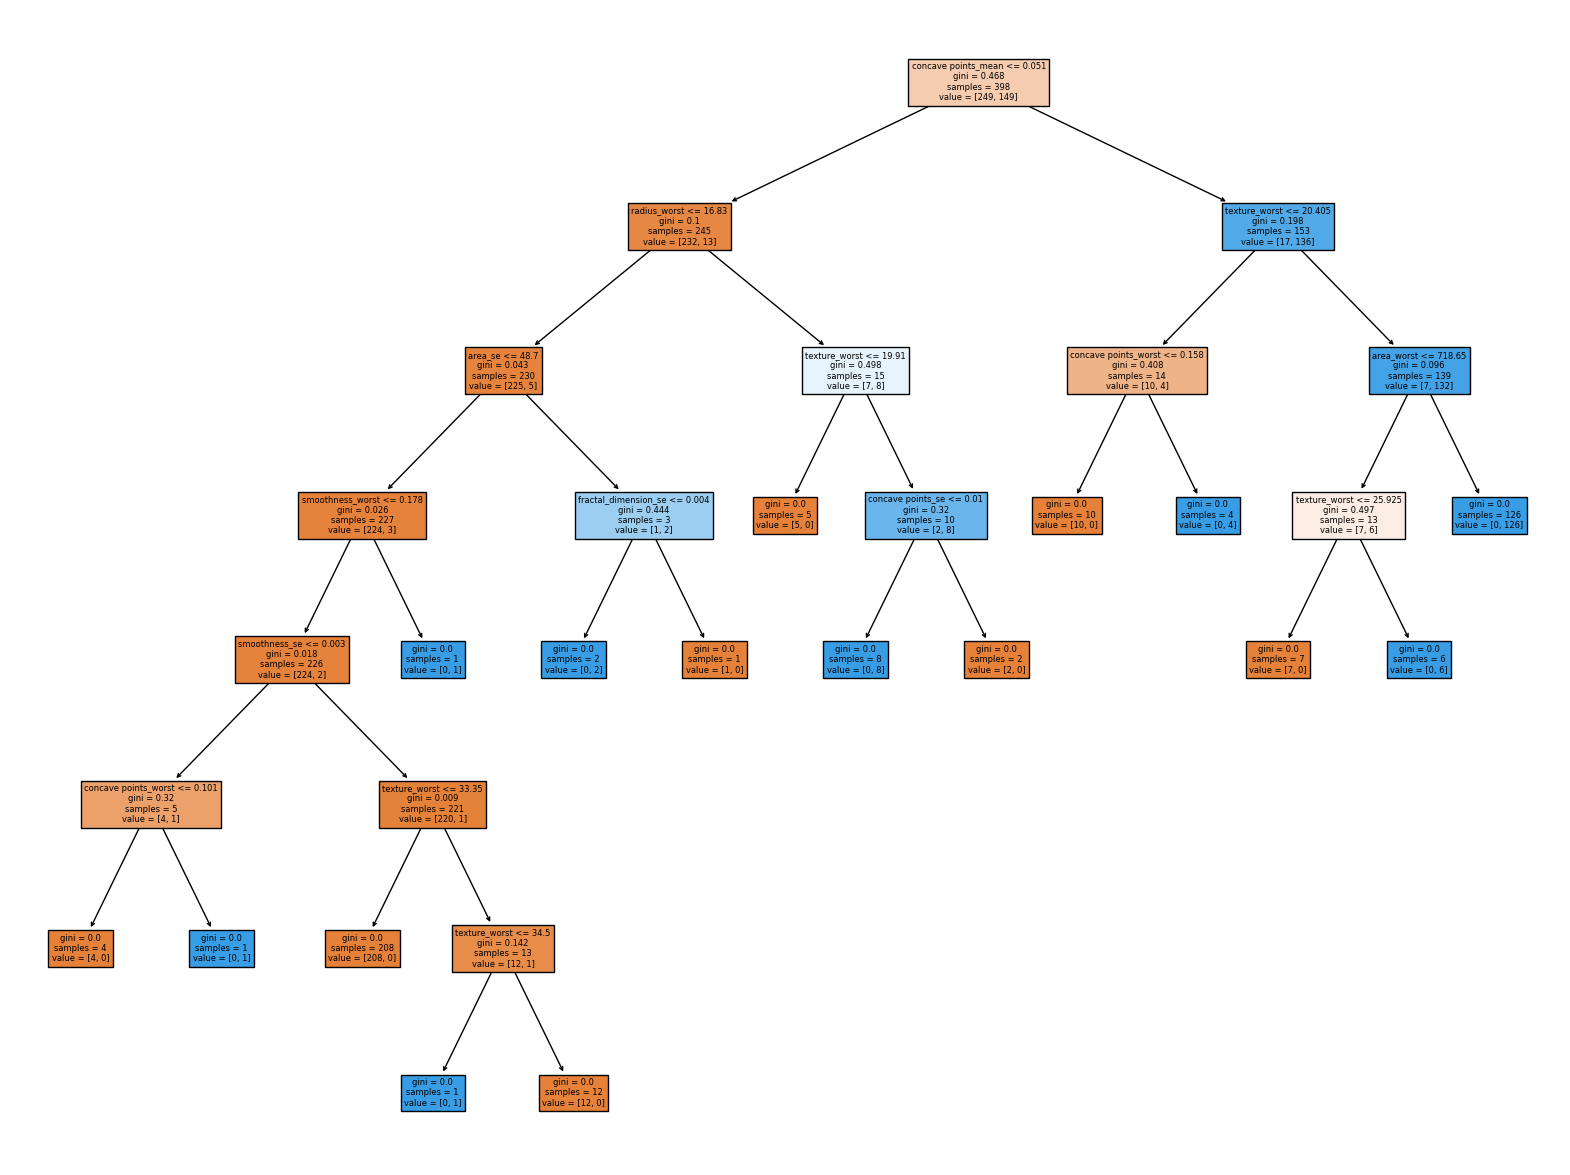

In [39]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(dtc, filled=True, feature_names = X.columns)
plt.show()

In [40]:
pruning_path =dtc.cost_complexity_pruning_path(X_train,Y_train) 
ccp_alpha_values = pruning_path.ccp_alphas 
ccp_alpha_values

array([0.        , 0.00249033, 0.00335008, 0.00491483, 0.00635319,
       0.0080402 , 0.01072027, 0.0143575 , 0.01623502, 0.01716941,
       0.01852043, 0.0281733 , 0.33063959])

# Pruning Path

In [41]:
path_list = [] 

for c in ccp_alpha_values:
    dtc_model= DecisionTreeClassifier(random_state=42, ccp_alpha=c)
    dtc_model.fit(X_train, Y_train)
    path_list.append(dtc_model)

In [42]:
path_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.002490327744919282, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.003350083752093802, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0049148318490037, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.006353192252522264, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.008040201005025125, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.010720268006700168, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014357501794687725, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01623502126014689, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.017169410972961114, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.018520434173232327, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.02817329768633045, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.33063958679437366, random_state=42)]

In [43]:
train_score= [ dtc_model.score(X_train,Y_train) for dtc_model in path_list ] 
test_score= [dtc_model.score(X_test, Y_test) for dtc_model in path_list] 
score_pairs = zip(train_score, test_score)

for train, test in score_pairs:
    print("Train Score = {:.4f} <===> Test Score = {:.4f}".format(train, test))

Train Score = 1.0000 <===> Test Score = 0.9415
Train Score = 0.9950 <===> Test Score = 0.9591
Train Score = 0.9925 <===> Test Score = 0.9591
Train Score = 0.9899 <===> Test Score = 0.9649
Train Score = 0.9874 <===> Test Score = 0.9649
Train Score = 0.9824 <===> Test Score = 0.9649
Train Score = 0.9698 <===> Test Score = 0.9591
Train Score = 0.9598 <===> Test Score = 0.9415
Train Score = 0.9447 <===> Test Score = 0.9415
Train Score = 0.9422 <===> Test Score = 0.9298
Train Score = 0.9397 <===> Test Score = 0.9064
Train Score = 0.9246 <===> Test Score = 0.8947
Train Score = 0.6256 <===> Test Score = 0.6316


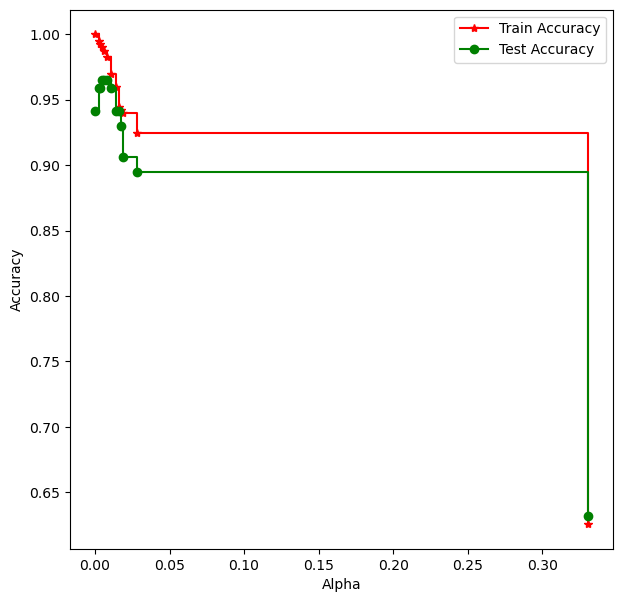

In [44]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(ccp_alpha_values, train_score, marker='*',color="red",label="Train Accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_score, marker='o',color="green", label="Test Accuracy", drawstyle="steps-post")
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.legend()
plt.show()

In [45]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
clf.fit(X_train,Y_train)


DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

In [46]:
pred=clf.predict(X_test)
accuracy_score(Y_test, pred)

0.9649122807017544

# Visualize the pruned tree

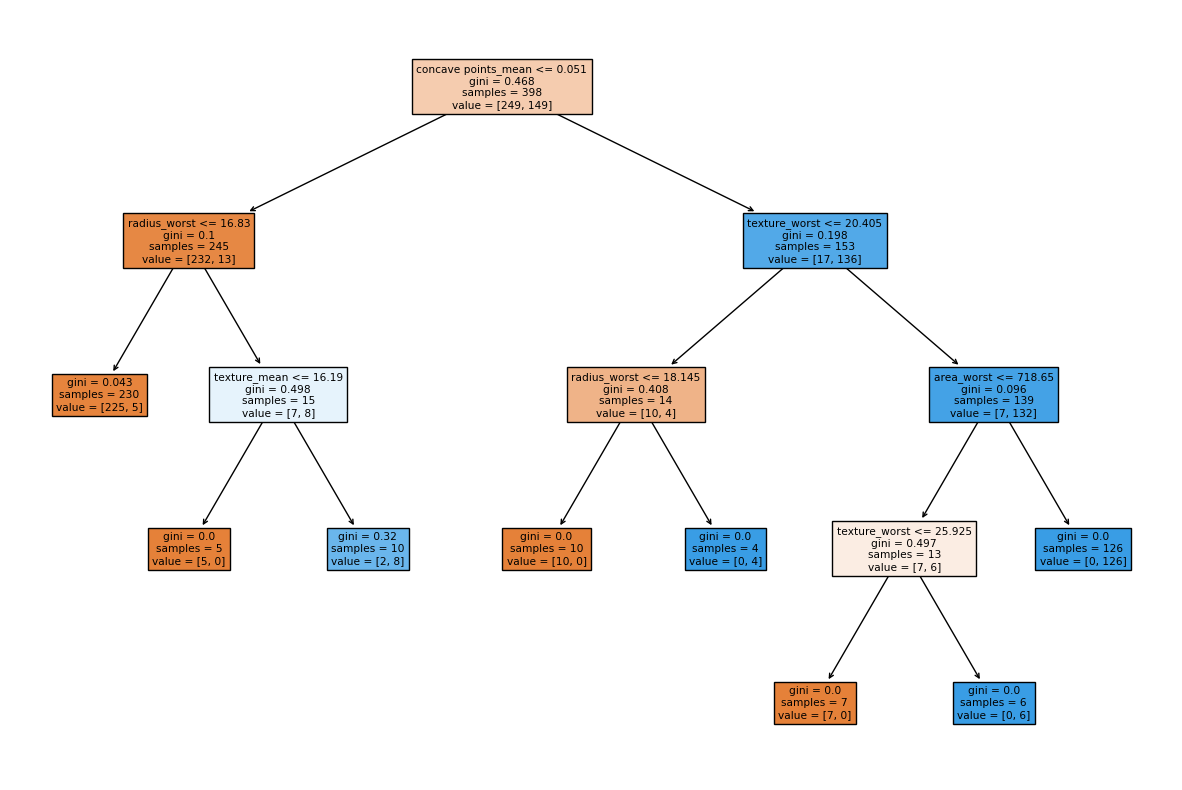

In [47]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names = X.columns)
plt.show()